In [330]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [331]:
X,y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [332]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.846589,-0.359062,0.931955,-3.685177,-0.042580,0
1,1.704191,0.262213,-2.464707,0.813706,1.491750,0
2,1.374614,-0.917230,0.731407,0.676926,-1.460550,1
3,1.105227,0.476180,-0.823228,-1.392094,3.509070,0
4,1.462211,1.095971,-2.403511,-0.865338,3.368305,0


In [384]:
df

,col1,col2,col3,col4,col5,target
0,1.846589,-0.359062,0.931955,-3.685177,-0.042580,0
1,1.704191,0.262213,-2.464707,0.813706,1.491750,0
2,1.374614,-0.917230,0.731407,0.676926,-1.460550,1
3,1.105227,0.476180,-0.823228,-1.392094,3.509070,0
4,1.462211,1.095971,-2.403511,-0.865338,3.368305,0
...,...,...,...,...,...,...
95,1.481062,0.378529,-0.804982,0.127852,-1.104526,0
96,0.403009,-0.929187,0.584663,0.409783,-1.193017,1
97,0.038191,1.311269,-0.664068,-2.127931,-1.873890,0
98,1.657569,0.429421,0.049609,-1.741004,0.420775,0


In [333]:
# function for row sampling
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [334]:
# function for col sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*df.shape[1]-1))
  new_df =  df[cols].copy() # Explicitly create a copy
  new_df['target'] = df['target']
  return new_df

In [335]:
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [336]:
df1 = sample_rows(df,0.2)

In [337]:
df2 = sample_rows(df,0.2)

In [338]:
df3 = sample_rows(df,0.2)

In [339]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [340]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [341]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.094\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.4, 0.5, 'x[4] <= 1.087\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

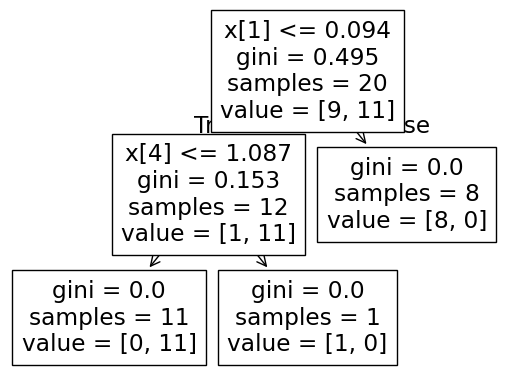

In [342]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[1] <= 0.113\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.625, 0.5, '  False')]

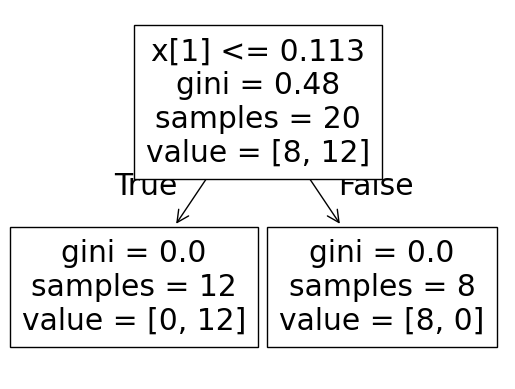

In [343]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'x[1] <= 0.203\ngini = 0.42\nsamples = 20\nvalue = [6, 14]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 1.019\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

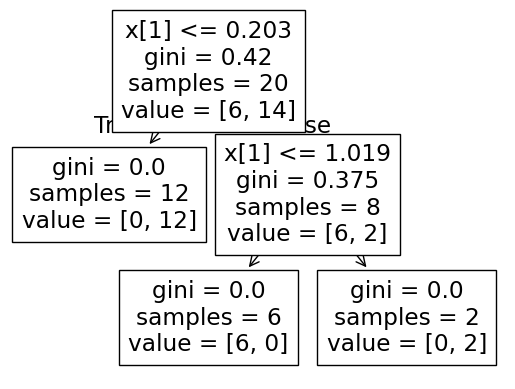

In [344]:
plot_tree(clf3)

In [345]:
clf1.predict(np.array([0.987771,	1.609146,	2.277549,	-0.948908,	-2.403337]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [346]:
clf2.predict(np.array([0.987771,	1.609146,	2.277549,	-0.948908,	-2.403337]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [347]:
clf3.predict(np.array([0.987771,	1.609146,	2.277549,	-0.948908,	-2.403337]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [348]:
df1 = sample_features(df,0.8)

In [349]:
df2 = sample_features(df,0.8)

In [350]:
df3 = sample_features(df,0.8)

In [351]:
df1

,col4,col5,col3,target
0,-3.685177,-0.042580,0.931955,0
1,0.813706,1.491750,-2.464707,0
2,0.676926,-1.460550,0.731407,1
3,-1.392094,3.509070,-0.823228,0
4,-0.865338,3.368305,-2.403511,0
...,...,...,...,...
95,0.127852,-1.104526,-0.804982,0
96,0.409783,-1.193017,0.584663,1
97,-2.127931,-1.873890,-0.664068,0
98,-1.741004,0.420775,0.049609,0


In [352]:
df2

,col5,col3,col4,target
0,-0.042580,0.931955,-3.685177,0
1,1.491750,-2.464707,0.813706,0
2,-1.460550,0.731407,0.676926,1
3,3.509070,-0.823228,-1.392094,0
4,3.368305,-2.403511,-0.865338,0
...,...,...,...,...
95,-1.104526,-0.804982,0.127852,0
96,-1.193017,0.584663,0.409783,1
97,-1.873890,-0.664068,-2.127931,0
98,0.420775,0.049609,-1.741004,0


In [353]:
df3

,col2,col1,col5,target
0,-0.359062,1.846589,-0.042580,0
1,0.262213,1.704191,1.491750,0
2,-0.917230,1.374614,-1.460550,1
3,0.476180,1.105227,3.509070,0
4,1.095971,1.462211,3.368305,0
...,...,...,...,...
95,0.378529,1.481062,-1.104526,0
96,-0.929187,0.403009,-1.193017,1
97,1.311269,0.038191,-1.873890,0
98,0.429421,1.657569,0.420775,0


In [376]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [377]:
clf1.fit(df1.iloc[:,0:-1],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:-1],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:-1],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.4230769230769231, 0.9, 'x[1] <= -0.018\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.15384615384615385, 0.7, 'x[0] <= -0.855\ngini = 0.12\nsamples = 47\nvalue = [3.0, 44.0]'),
 Text(0.28846153846153844, 0.8, 'True  '),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.5, 'x[2] <= -2.759\ngini = 0.083\nsamples = 46\nvalue = [2, 44]'),
 Text(0.15384615384615385, 0.3, 'x[1] <= -0.955\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(0.6923076923076923, 0.7, 'x[2] <= 1.181\ngini = 0.201\nsamples = 53\nvalue = [47, 6]'),
 Text(0.5576923076923077, 0.8, '  False'),
 Text(0.5384615384615384, 0.5, 'x[0] <= 0.898\ngini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(0.46153846153846156, 0.3, 'gini

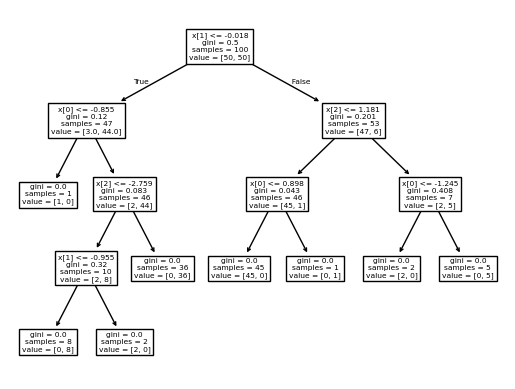

In [380]:
plot_tree(clf1)

[Text(0.375, 0.9166666666666666, 'x[1] <= -0.22\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.14285714285714285, 0.75, 'x[0] <= -2.171\ngini = 0.048\nsamples = 41\nvalue = [40, 1]'),
 Text(0.2589285714285714, 0.8333333333333333, 'True  '),
 Text(0.07142857142857142, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21428571428571427, 0.5833333333333334, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.6071428571428571, 0.75, 'x[0] <= 0.405\ngini = 0.282\nsamples = 59\nvalue = [10, 49]'),
 Text(0.49107142857142855, 0.8333333333333333, '  False'),
 Text(0.35714285714285715, 0.5833333333333334, 'x[0] <= -0.081\ngini = 0.083\nsamples = 46\nvalue = [2, 44]'),
 Text(0.21428571428571427, 0.4166666666666667, 'x[1] <= 0.498\ngini = 0.046\nsamples = 42\nvalue = [1, 41]'),
 Text(0.14285714285714285, 0.25, 'x[1] <= 0.454\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Tex

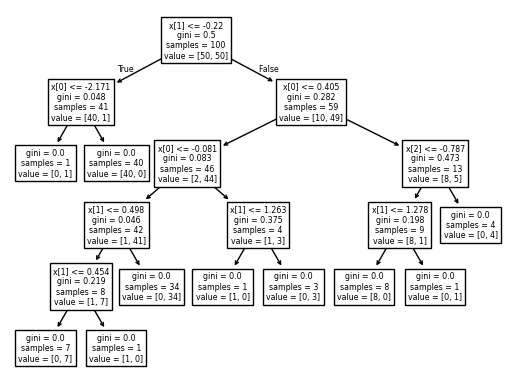

In [381]:
plot_tree(clf2)

[Text(0.5, 0.9166666666666666, 'x[0] <= -0.018\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.25, 0.75, 'x[2] <= 1.387\ngini = 0.12\nsamples = 47\nvalue = [3.0, 44.0]'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[0] <= -0.384\ngini = 0.044\nsamples = 44\nvalue = [1, 43]'),
 Text(0.0625, 0.4166666666666667, 'gini = 0.0\nsamples = 39\nvalue = [0, 39]'),
 Text(0.1875, 0.4166666666666667, 'x[0] <= -0.319\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.5833333333333334, 'x[2] <= 1.977\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3125, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4375, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.75, 'x[1] <= 3.31\ngini = 0.201\nsamples = 53\nvalue = [47, 6]'),
 Text(0.625, 0.8333333333333333, '  False'),
 Text

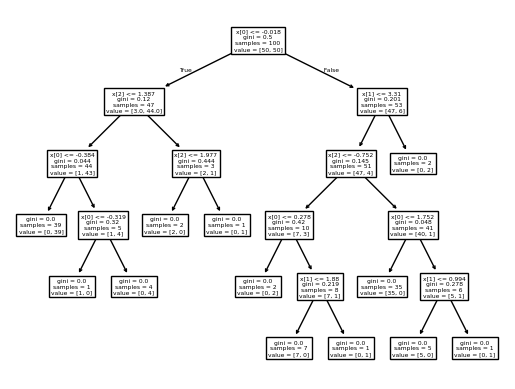

In [382]:
plot_tree(clf3)

In [386]:
clf1.predict(np.array([0.038191,	1.311269,	-0.664068]).reshape(1,3))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [387]:
clf2.predict(np.array([0.038191,	1.311269,	-0.664068]).reshape(1,3))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [388]:
clf3.predict(np.array([0.038191,	1.311269,	-0.664068]).reshape(1,3))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])